# External Forcing in MITgcm

#### Overview
In this notebook, we examine yet another model in MITgcm: the `global_ocean_ebm`. We will build and run this experiment on Spartan.

#### Import Modules
Before we begin, import the modules required to access read data and create plots.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm

After the modules are loaded in, establish a path to the directory for this week's class:

In [ ]:
# Define a path to this lesson's folder
lesson_folder = ''

## Preparing the Model

There are a few steps to get this model set up. Begin by moving into the model directory:

```
cd MITgcm/verification/global_ocean_ebm
```

This model builds off the `tutorial_global_oce_latlon` experiment and has a script called `prepare_run` in the input diectories to make sure the correct input files are linked. Here, we will use the `input.w_exf` file set. Move into this directory and run the preparation script:

```
cd input.w_exf
bash prepare_run
```

## Building the Model

Next, we'll examine the model configuration. Move into the code directory. Since we're on Spartan, we'll leverage MPI and spread our model across multiple processors. Update the `SIZE.h` to make this change:

```
mv code/SIZE.h code/SIZE.h_no_mpi
mv code/SIZE.h_mpi code/SIZE.h
```

After making this change, move to the run directory and run the familiar run commands:

```
cd build
export MPI_HOME=/scratch/home/[username]/.conda/envs/ms274
../../../tools/genmake2 -of ../../../tools/build_options/linux_amd64_gfortran -mods ../code -mpi
make depend
make
```

#### &#x1F914; Questions:
While your model is compiling, answer the following questions:
1. How many processors will this model use? 6
2. What are the total dimensions of the model grid? 90 * 40

## The External Forcing Package

This experiment provides a working example for the `exf` package allowing for the prescription of external forcing conditions such as atmospheric temperature, wind, etc. At runtime, the `exf` package has been activated in the `packages.conf` file.

Let's take a look at the `data.exf` file in the `input.w_exf` directory which will provide the implementation. Open up this file with `nano` or `vim`.

#### data.exf Modifications

Before moving on, make the following edits:

1. Change `climsstfile  = 'lev_sst_startdec.tmp'` to `climsstfile  = 'lev_sst.bin',`
2. Change the `climsst` lines to
```
# climsststartdate1 = 19911216,
# climsststartdate2 = 000000,
 climsstperiod     = -12.,
```
3. Uncomment the `sfluxfile`

#### &#x1F914; Questions
After making the changes above, answer the following questions:
1. Which external forcing fields are going to be prescribed in this model run? zonal and meridonial wind stress, freshwater flux, heat flux.
2. What is the period that these fields will be prescribed? 12 months (1 year)
3. What are the sizes of these grids? 90 x 40

## Visualizing the `exf` fields
To get familiar with the `exf` fields that will be prescribed in the model, let's have a look at some of the fields. Download the `*.bin` files for Spartan so we can examine them.

With these files in hand, let's read one of them in and make some plots.

In [29]:
# define a path to one of the exf files
qnet_file = '/Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/input.w_exf/ncep_qnet.bin'
# qnet_file = '/Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/input.w_exf/lev_sst.bin'

# read in the exf grid

# read in the file and reshape it to the proper dimensions
n_rows = 40  #sNy
n_cols = 90 #sNx
period = 12
qnet_grid = np.fromfile(qnet_file, '>f4').reshape((period, n_rows, n_cols))

# check the bounds of the file
print("Overall Qnet range:", qnet_grid.min(), "to", qnet_grid.max())



Overall Qnet range: -224.92242 to 441.61362


Next, let's make a plot for each month in the file organized in 4 rows and 3 columns.

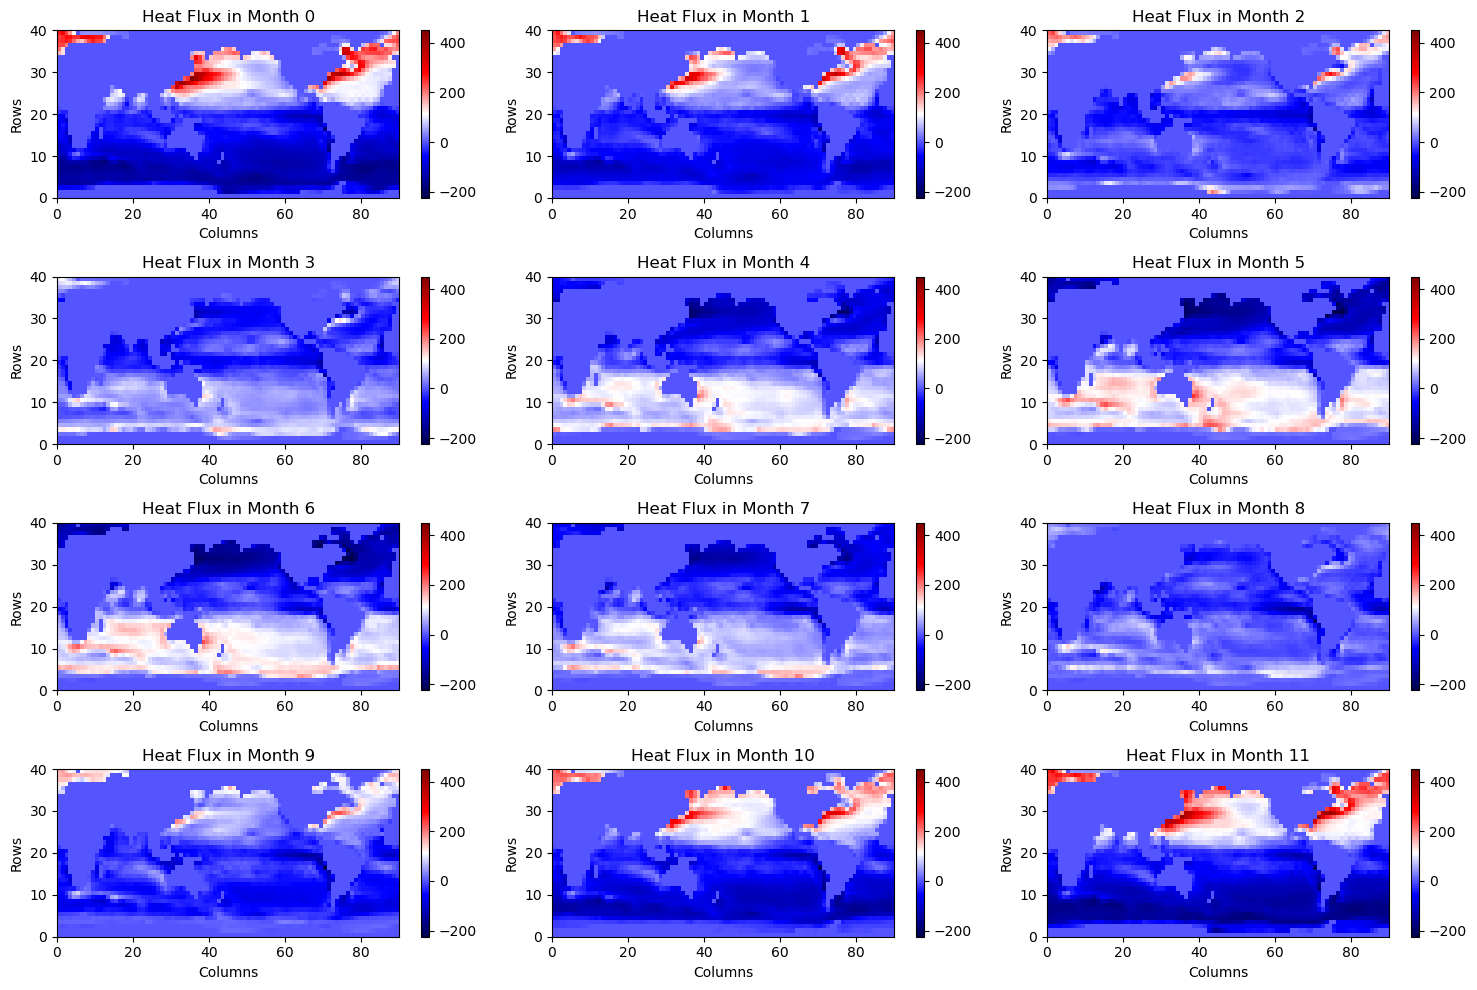

In [30]:
# make your figure here
# print(qnet_grid)
# print(np.shape(qnet_grid[0]))
fig = plt.figure(figsize=(15, 10))

# month = qnet_grid[1]
# 12, 40, 90

# i = 0
# for month in qnet_grid: 
#     i = i + 1

for i, month in enumerate(qnet_grid):
    plt.subplot(4,3,i+1)

    # plot the field
    C = plt.pcolormesh(month, cmap='seismic', vmin=-225, vmax=450)
    # C = plt.pcolormesh(month, cmap='turbo', vmin=-3, vmax=32)

    # add a colorbar
    plt.colorbar(C)
    
    # show the figure
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('Heat Flux in Month ' + str(i))

plt.tight_layout()
plt.show()

Be sure to label your axes and scale each plot equivalently.

## Run the Model

After getting familiar with the model, let's prepare the model run directory to run it

```
cd ../run
ln -s ../input.w_exf/* .
ln -s ../build/mitgcmuv .
```

Next, edit the `data.diagnostics` directory to have the existing output organized into directories according to the following tree:

```
diags
 |-diagsEXF
 |-diagSurf
 |-diag_vel_k2
```

Then, adjust the `data` file so that the model is set run for 10 years. In addition, comment out the following lines and reset the monitor frequency:

```
# dumpFreq=   311040000.,
# dumpFreq=   864000.,
# taveFreq=   311040000.,
# taveFreq=   864000.,
 monitorFreq=864000.,
```

Finally, create a slurm job script for the appropriate number of processors. When you're ready, submit the job to run the model.

This week's homework will be dedicated to assessing the model output.